<a href="https://colab.research.google.com/github/COLLS003/Nile/blob/main/Nile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Preprocessing

In [52]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK data if not already downloaded


In [53]:
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load dataset

In [54]:
df = pd.read_csv("rejects.csv")

# Display the first few rows of the dataset

In [55]:
print(df.head())

                                               Email  Status
0  Thank you for applying to the Junior Software ...  reject
1  Thank you for your interest in the Train To Hi...  reject
2  eth, \n\nThank you for your interest in Exyn a...  reject
3  Thank you for your interest in the Software En...  reject
4  Hi Seth,\n\nThank you for your interest in Pat...  reject


# Concatenate all email contents into a single string

In [56]:
emails = df.Email.str.cat(sep='')


# Tokenize the emails

In [57]:
tokens = word_tokenize(emails)

# Remove stop words

In [58]:
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]


# Calculate word frequency distribution

In [59]:
frequency_dist = nltk.FreqDist(tokens)

# Display word cloud

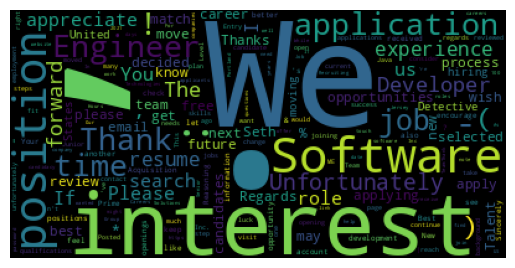

In [60]:
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Update the 'Status' column

In [61]:
modified_df = df.copy()
modified_df['Status'] = modified_df['Status'].map({'reject': 1, 'not_reject': 0})
features = modified_df['Email']
labels = modified_df['Status']

# Display data shape

In [62]:
print("Shape of features:", features.shape)
print("Shape of labels:", labels.shape)

Shape of features: (129,)
Shape of labels: (129,)


# Machine Learning Part

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split train and test data

In [63]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Text classifier

In [65]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
features_train_transformed = vectorizer.fit_transform(features_train)
features_test_transformed = vectorizer.transform(features_test)


# Feature selection

In [66]:
selector = SelectPercentile(f_classif, percentile=1)
selector.fit(features_train_transformed, labels_train)
features_train_transformed = selector.transform(features_train_transformed).toarray()
features_test_transformed = selector.transform(features_test_transformed).toarray()

# Decision Tree

In [69]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(features_train_transformed, labels_train)
dt_score = dt_classifier.score(features_test_transformed, labels_test)
print("Decision Tree Score:", dt_score)

Decision Tree Score: 0.8974358974358975



# Random Forest

In [72]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(features_train_transformed, labels_train)
rf_score = rf_classifier.score(features_test_transformed, labels_test)
print("Random Forest Score:", rf_score)

Random Forest Score: 0.9230769230769231


# Logistic Regression

In [67]:
reg_classifier = LogisticRegression()
reg_classifier.fit(features_train_transformed, labels_train)
score = reg_classifier.score(features_test_transformed, labels_test)
print("Logistic Regression Score:", score)

Logistic Regression Score: 0.9743589743589743


# Support Vector Machine

In [73]:
svm_classifier = SVC()
svm_classifier.fit(features_train_transformed, labels_train)
svm_score = svm_classifier.score(features_test_transformed, labels_test)
print("Support Vector Machine Score:", svm_score)

Support Vector Machine Score: 0.8974358974358975


In [68]:
# Save models and transformers
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('selector.pkl', 'wb') as f:
    pickle.dump(selector, f)

with open('reg_classifier.pkl', 'wb') as f:
    pickle.dump(reg_classifier, f)